# BET Surface Area

The Brunauer, Emmet and Teller (BET) equation for determining the specific surface area from multilayer adsorption of nitrogen was first reported in 1938 [1].  The BET model differs from the Langmuir model primarily in that it is a model of multi-layer adsorption where as the Langmuir model explicitly assumes only a single monolayer of adsorbate.  Additionally, the model applies to isotherm data using relative pressure as the independent variable rather than absolute pressure. Brunauer, Emmet and Teller show the relative pressure $P^{rel}$ and the quantity of gas adsorbed $Q$ have the relationship,

$\displaystyle {\frac{1}{Q(1/P^{rel}-1)}} = \left(\frac{C-1}{Q_m C}\right)P^{rel} + \frac{1}{Q_m C}$

where the left-hand expression is referred to as the BET transform and $C$ and $Q_m$ are the BET constant and the monolayer quantity adsorbed.  In the above expression, the BET Transform is linear in the relative pressure, so a linear least-squares fit may be applied to measured isotherm data from which one obtains the the slope of the best fit line $m$ and the Y-intercept $Y_0$ along with statistical uncertainties.  From these quantities, the monolayer capacity $Q_m$ and the BET constant $C$ are determined,

$\displaystyle {C = 1 + \frac{m}{Y_0}}   \hspace{4em}   \displaystyle Q_m = \frac{1}{C Y_0}$

Like the Langmuir model, we calculate the surface area as the cross-sectional area of the adsorptive multiplied by the number of molecules in the monolayer,

$\displaystyle A_{BET} = N_A\frac{Q_m}{Q_{mol}} \sigma = \frac{N_A\sigma}{Q_{mol}(m + Y_0)}$

where in the above, $N_A$ is the Avagadro constant, and we compute the number of moles of gas in the monolayer as $Q_m/Q_{mol}$ where $Q_{mol} =$ 22414.0 $\textrm{cm}^3/\textrm{g STP}$ is one mole of gas at STP per gram of sample material.  

The uncertainty in the surface area is also useful to report, and this is related to the uncertainty in the line fit results,

$\displaystyle \delta{A_{BET}} = A_{BET} \frac{\sqrt{\delta_m^2+\delta_{Y_0}^2}}{m + Y_0}$

Finally, we note that the linear relationship in the BET equation between $Q$ and $P^{rel}$ has been shown to be a good approximation for the relative pressure range of approximately 0.05 to 0.3, so the data used for the linear fit is typically taken for just this part of the adsorption isotherm.

[1] Brunauer, Stephen, Paul Hugh Emmett, and Edward Teller. ["Adsorption of Gases in Multimolecular Layers."](http://pubs.acs.org/doi/abs/10.1021/ja01269a023) Journal of the American Chemical Society 60, no. 2 (1938): 309-319.

## BET: Example Calculation

As an example of the BET calculation, we use the reference calculation from the [report-models-python](https://github.com/Micromeritics/report-models-python) on github from Micromeritics. This resource provides example data as well as an implementation of the BET calculation along with convenient tools for displaying and manipulating results.   

We use a Carbon Black Reference material, Nitrogen at 77K for our isotherm, and restrict the calculation to the range 0.05 to 0.3 relative pressure.  The cross-sectional area of Nitrogen is $\sigma_{N_2}\approx$ 0.162 $\textrm{nm}^2$. Below we show the tranform plot with best fit line, and we show the isotherm plot with the BET model isotherm. 

BET surface area: 20.7050 cm^3/g STP
BET C: 149.9615
BET Qm: 4.7569 cm^3/g STP


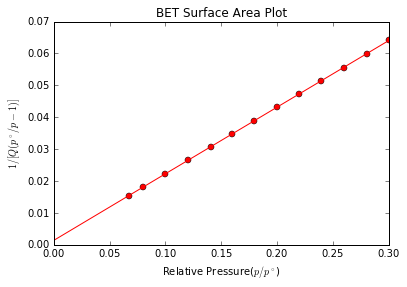

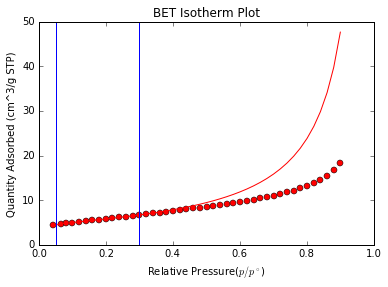

In [1]:
%matplotlib inline
from micromeritics import bet, util, plots
from micromeritics import isotherm_examples as ex

s = ex.carbon_black()   # example isotherm of Carbon Black with N2.  
pmin = 0.05              # 0.05 to 0.30 range for BET 
pmax = 0.3
B = bet.bet(s.Prel, s.Qads, Pmin=pmin, Pmax=pmax, csa = 0.162)
print("BET surface area: %.4f cm^3/g STP" % B.sa)
print("BET C: %.4f" % B.C)
print("BET Qm: %.4f cm^3/g STP" % B.q_m)
plots.plotBETTransform(B)
plots.plotBETIsotherm(B)
plots.addRangeBars(pmin, pmax)
plots.show()